In [1]:
import numpy as np

# 1. Load the file EnergyConsumers.txt into a 2D array named Consumers.

with open("EnergyConsumers.txt" , "r") as file :
    lines = file.read().splitlines()
    Consumers_records_list = []
    Consumers_countries_list = []
    Consumers_values_list = []
    for line in lines:
        line = line.replace("\t" , ",")
        Consumers_records_list.append(line)
        
Consumers_records_list = Consumers_records_list[2:]             # Removing the titles

In [2]:
Consumers_years_list = Consumers_records_list[0]
Consumers_years_list = Consumers_years_list[1:].split(",")
Consumers_data_list = Consumers_records_list[1:]

In [3]:
temp = []
jlist = []

for i in range(len(Consumers_data_list)):
    Consumers_data_list[i] = Consumers_data_list[i].split(",")
    Consumers_countries_list.append(Consumers_data_list[i][0])
    temp.append(Consumers_data_list[i][1:])
    
for i in temp:
    for j in i:
        jlist.append(float(j))
    Consumers_values_list.append(jlist)
    jlist = []
    
print(Consumers_countries_list)
print("\n",Consumers_values_list)

['Belgium', 'Czech Rep.', 'France', 'Germany', 'Italy', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Spain', 'Sweden', 'United Kingdom', 'Norway', 'Turkey', 'Kazakhstan', 'Russia', 'Ukraine', 'Uzbekistan', 'Canada', 'United States', 'Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Venezuela', 'China', 'India', 'Indonesia', 'Japan', 'Malaysia', 'South Korea', 'Taiwan', 'Thailand', 'Australia', 'New Zealand', 'Algeria', 'Egypt', 'Nigeria', 'South Africa', 'Iran', 'Kuwait', 'Saudi Arabia', 'United Arab Emirates']

 [[47.79839091, 50.01946971, 50.55444081, 49.38284116, 52.46034869, 53.34456769, 56.20864904, 56.26147508, 57.18513913, 57.42946846, 58.13153218, 58.01182128, 55.66704995, 57.99701606, 58.2791356, 58.2095796, 57.69399233, 56.70837843, 58.40120558, 56.11622048, 60.34469833, 56.20518725, 53.83669019, 55.77525679, 52.75679411, 53.258962, 56.07047248], [49.54339902, 44.75610039, 43.62137324, 42.29938993, 40.94902036, 41.50366338, 42.82815987, 43.0983744, 41.75528612, 39.01

In [4]:
Consumers = np.array(Consumers_values_list)
print(Consumers)

[[ 47.79839091  50.01946971  50.55444081 ...  52.75679411  53.258962
   56.07047248]
 [ 49.54339902  44.75610039  43.62137324 ...  41.18915641  40.74455738
   40.41479772]
 [224.8732018  237.6426856  234.3370491  ... 242.5843665  246.2017574
  242.531815  ]
 ...
 [  9.11493633   2.69191954   8.82610402 ...  33.88316713  36.86037389
   37.07984478]
 [ 58.00086042  67.51470552  76.93102379 ... 213.5229603  223.4796535
  222.7468515 ]
 [ 20.42594003  23.49031162  22.35890167 ...  70.39836557  75.71238769
   78.17266268]]


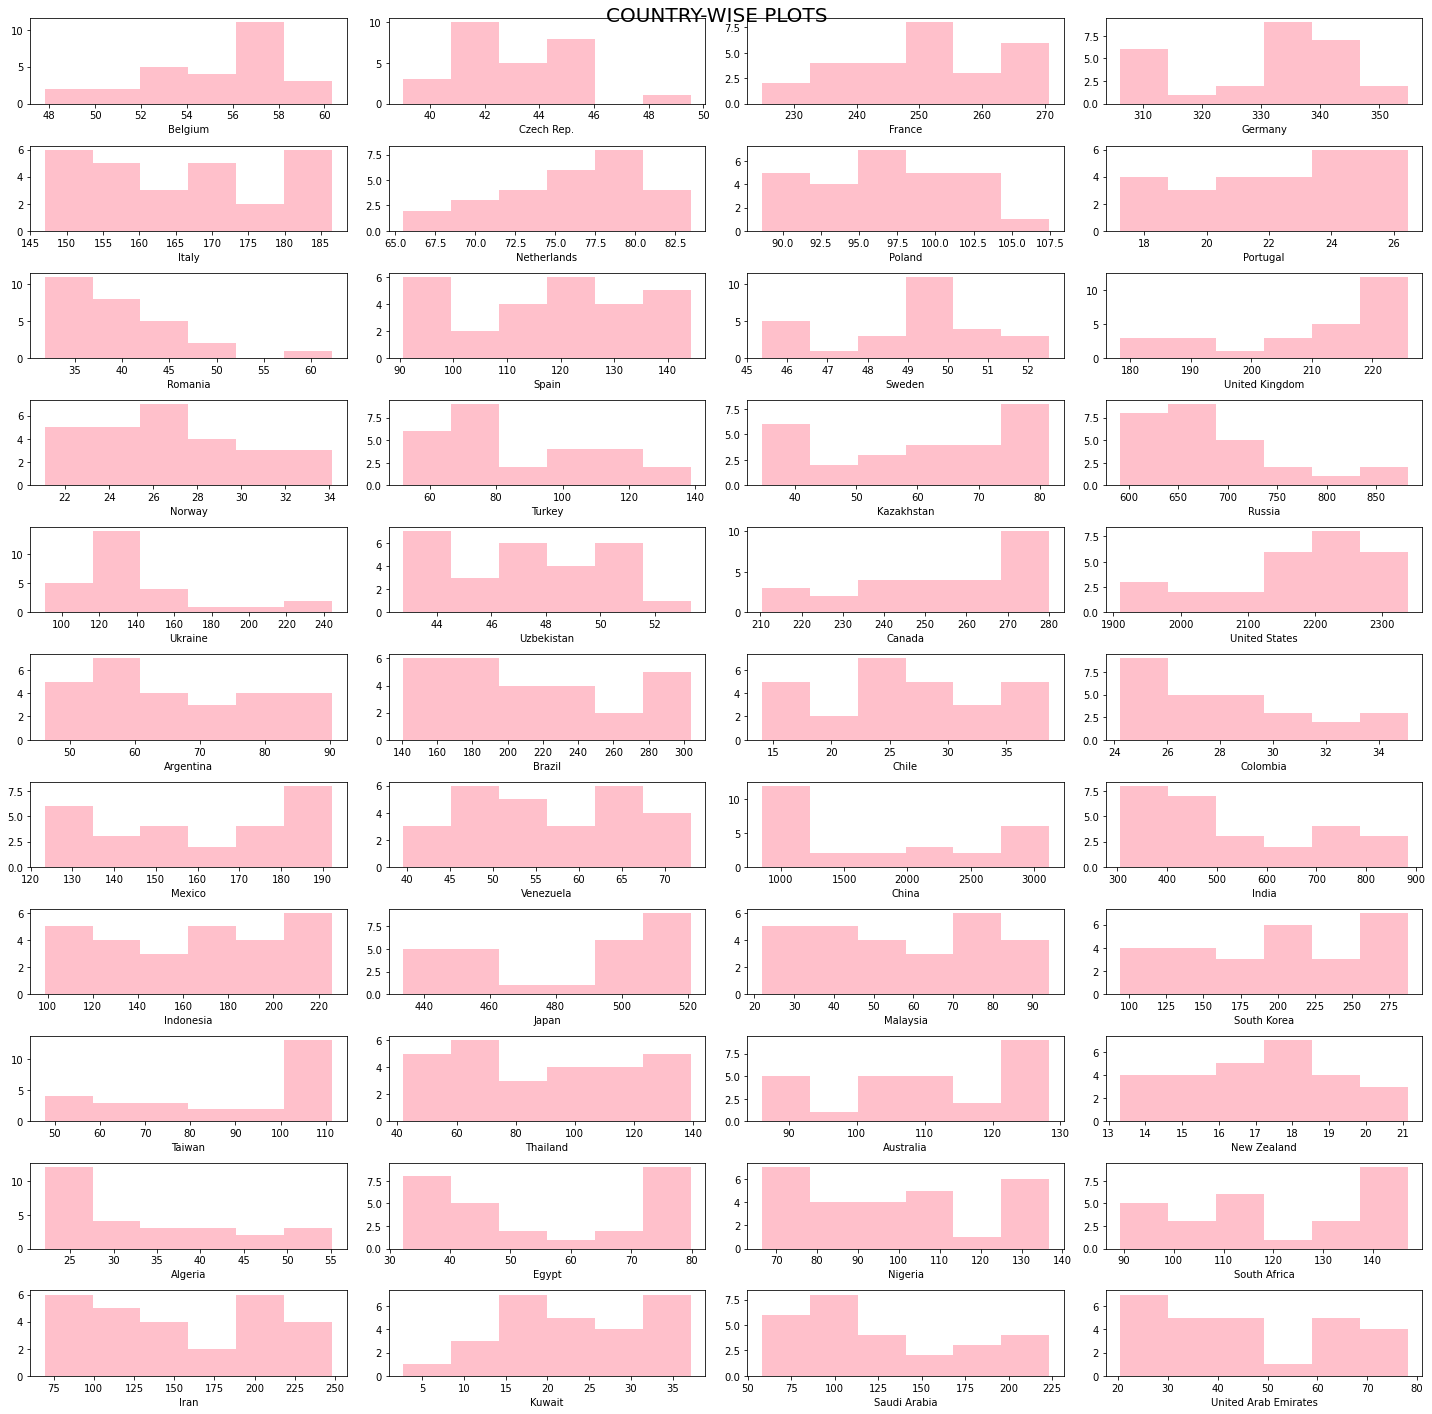

In [5]:
# 2.  Using Matplotlib, create a single histogram of the consumption for each country and each year from Consumers. 
#     Create a logical bin size, and give a title to the figure of your histogram.

import matplotlib.pyplot as plt
import math

count = 0

def findBins(Consumers):
    bins = math.ceil(len(Consumers) ** 0.5)
    return bins

fig, axes = plt.subplots(figsize=(20, 20), nrows = 11, ncols = 4)
ax = axes.flat

# PLOTTING GRAPHS BY ROWS i.e COUNTRY-WISE PLOTS

for i in range(Consumers.shape[0]): 
    count = count + 1
    ax[i].hist(Consumers[i , :] , findBins(Consumers[0]) , color = 'pink')
    ax[i].set_xlabel(Consumers_countries_list[i])
    fig.suptitle("COUNTRY-WISE PLOTS" , fontsize = 20)
    plt.tight_layout()
plt.show()
plt.close()

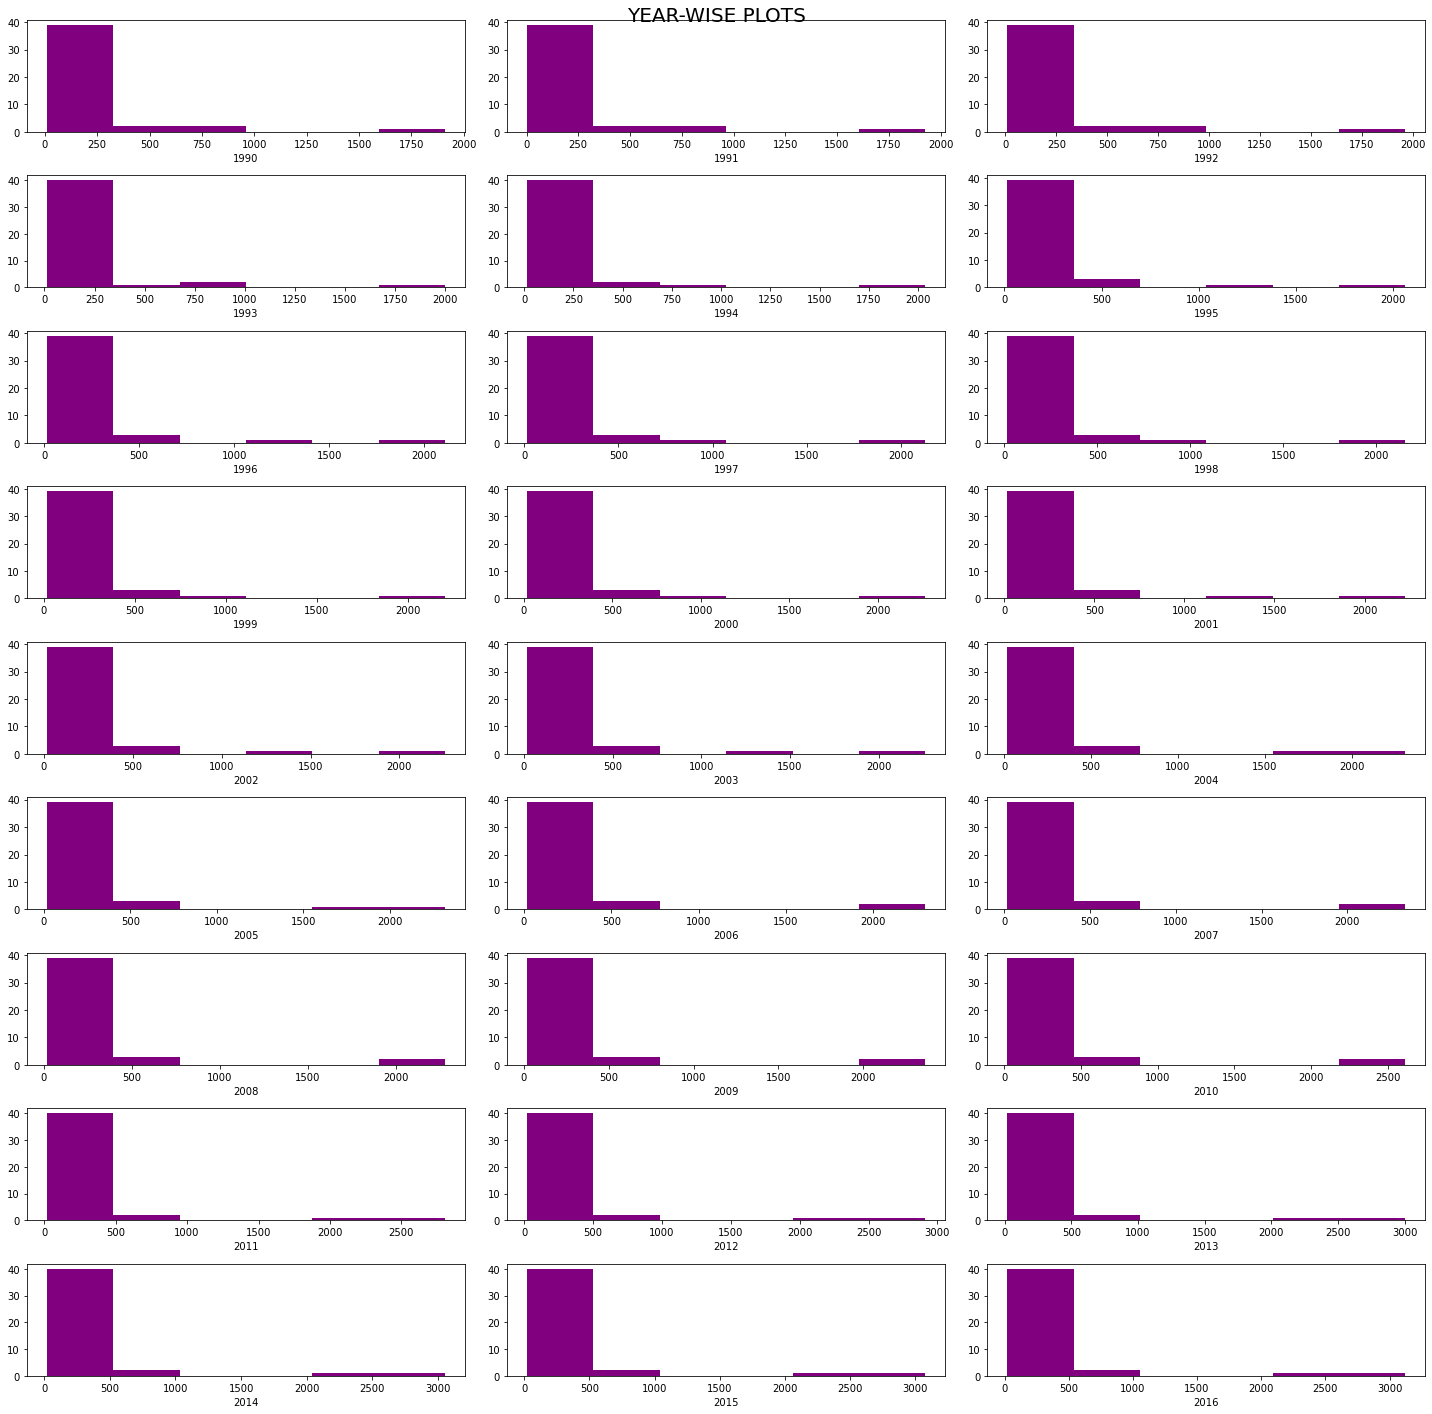

In [6]:
# PLOTTING BY COLUMNS i.e YEAR-WISE PLOTS

import matplotlib.pyplot as plt
import math

def findBins(Consumers):                      
    bins = math.ceil(len(Consumers) ** 0.5)
    return bins

fig, axes = plt.subplots(figsize=(20, 20), nrows = 9, ncols = 3)
ax = axes.flat

for i in range(Consumers.shape[1]):
    ax[i].hist(Consumers[: , i] , findBins(Consumers[1]) , color = 'purple')
    ax[i].set_xlabel(Consumers_years_list[i])
    fig.suptitle("YEAR-WISE PLOTS" , fontsize = 20)
    plt.tight_layout()
plt.show()
plt.close()

In [7]:
# 3. Load the file EnergyRawDataFinal.txt into any container (list, tuple, numpy array, etc.) named EnergyType.

import numpy as np
import pprint as pp

temp_countries_list = []
EnergyType_countries_list = []
EnergyType_data_list = []
EnergyType_electricity_list = []
EnergyType_naturalgas_list = []
EnergyType_years_list = []
EnergyType_type_list = []
EnergyType_dict = {}

with open("EnergyRawDataFinal.txt" , "r") as energy:
    EnergyType_record_list = energy.readlines()[1:]
    
    # STRIPPING EVERY LINE TO REMOVE \N FROM END
    for line in EnergyType_record_list:
        line = line.strip()    
        line = EnergyType_data_list.append(line)
    
    # READING TWO LINES AT A TIME BECAUSE EVERY TWO LINES IS SAME COUNTRY
    for i in range(1, len(EnergyType_data_list), 2):
        country1, elec_value, energy_type1, year1 = EnergyType_data_list[i-1].split(",")
       # print(f"\ncountry1 = {country1}, elec_value = {elec_value}, energy_type1 = {energy_type1}, year1 = {year1} ")
        country2, ngas_value, energy_type2, year2 = EnergyType_data_list[i].split(",")
       # print(f"country2 = {country2}, ngas_value = {ngas_value}, energy_type2 = {energy_type2}, year2 = {year2} ")
        
        if country1 not in EnergyType_dict:
            EnergyType_dict[country1] = {}
            EnergyType_dict[country1][energy_type1] = []
            EnergyType_dict[country1][energy_type2] = []
            
            EnergyType_dict[country1][energy_type1].append(float(elec_value))      # million tons of oil equivalent
            EnergyType_dict[country1][energy_type2].append(float(ngas_value))      # billion cubic meter
        else:
            EnergyType_dict[country1][energy_type1].append(float(elec_value))
            EnergyType_dict[country1][energy_type2].append(float(ngas_value))
            
        if year1 not in EnergyType_years_list:
            EnergyType_years_list.append(year1)
        
#pp.pprint(EnergyType_dict)

for country in EnergyType_dict:
    EnergyType_countries_list.append(country)
    
print(f"EnergyType_countries_list = {EnergyType_countries_list} \nLENGTH = {len(EnergyType_countries_list)}")
print(f"\n\nEnergyType_years_list = {EnergyType_years_list} \nLENGTH = {len(EnergyType_years_list)}")

      
for country, energy_type in EnergyType_dict.items():
    print(f"\ncountry = {country}")
    for e_keys, values in energy_type.items():
        print(f"e_keys = {e_keys} \nvalues = {values}")

EnergyType_countries_list = ['Belgium', 'Czech Rep.', 'France', 'Germany', 'Italy', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Spain', 'Sweden', 'United Kingdom', 'Norway', 'Turkey', 'Kazakhstan', 'Russia', 'Ukraine', 'Uzbekistan', 'Canada', 'United States', 'Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Venezuela', 'China', 'India', 'Indonesia', 'Japan', 'Malaysia', 'South Korea', 'Taiwan', 'Thailand', 'Australia', 'New Zealand', 'Algeria', 'Egypt', 'Nigeria', 'South Africa', 'Iran', 'Kuwait', 'Saudi Arabia', 'United Arab Emirates'] 
LENGTH = 44


EnergyType_years_list = ['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'] 
LENGTH = 26

country = Belgium
e_keys = Electricity 
values = [59.11, 61.78, 63.87, 64.64, 67.82, 69.83, 71.41, 73.32, 75.53, 76.05, 79.17, 79.82, 80.44, 82.07, 83.76, 83.64, 86.06, 86.08, 85.82, 7

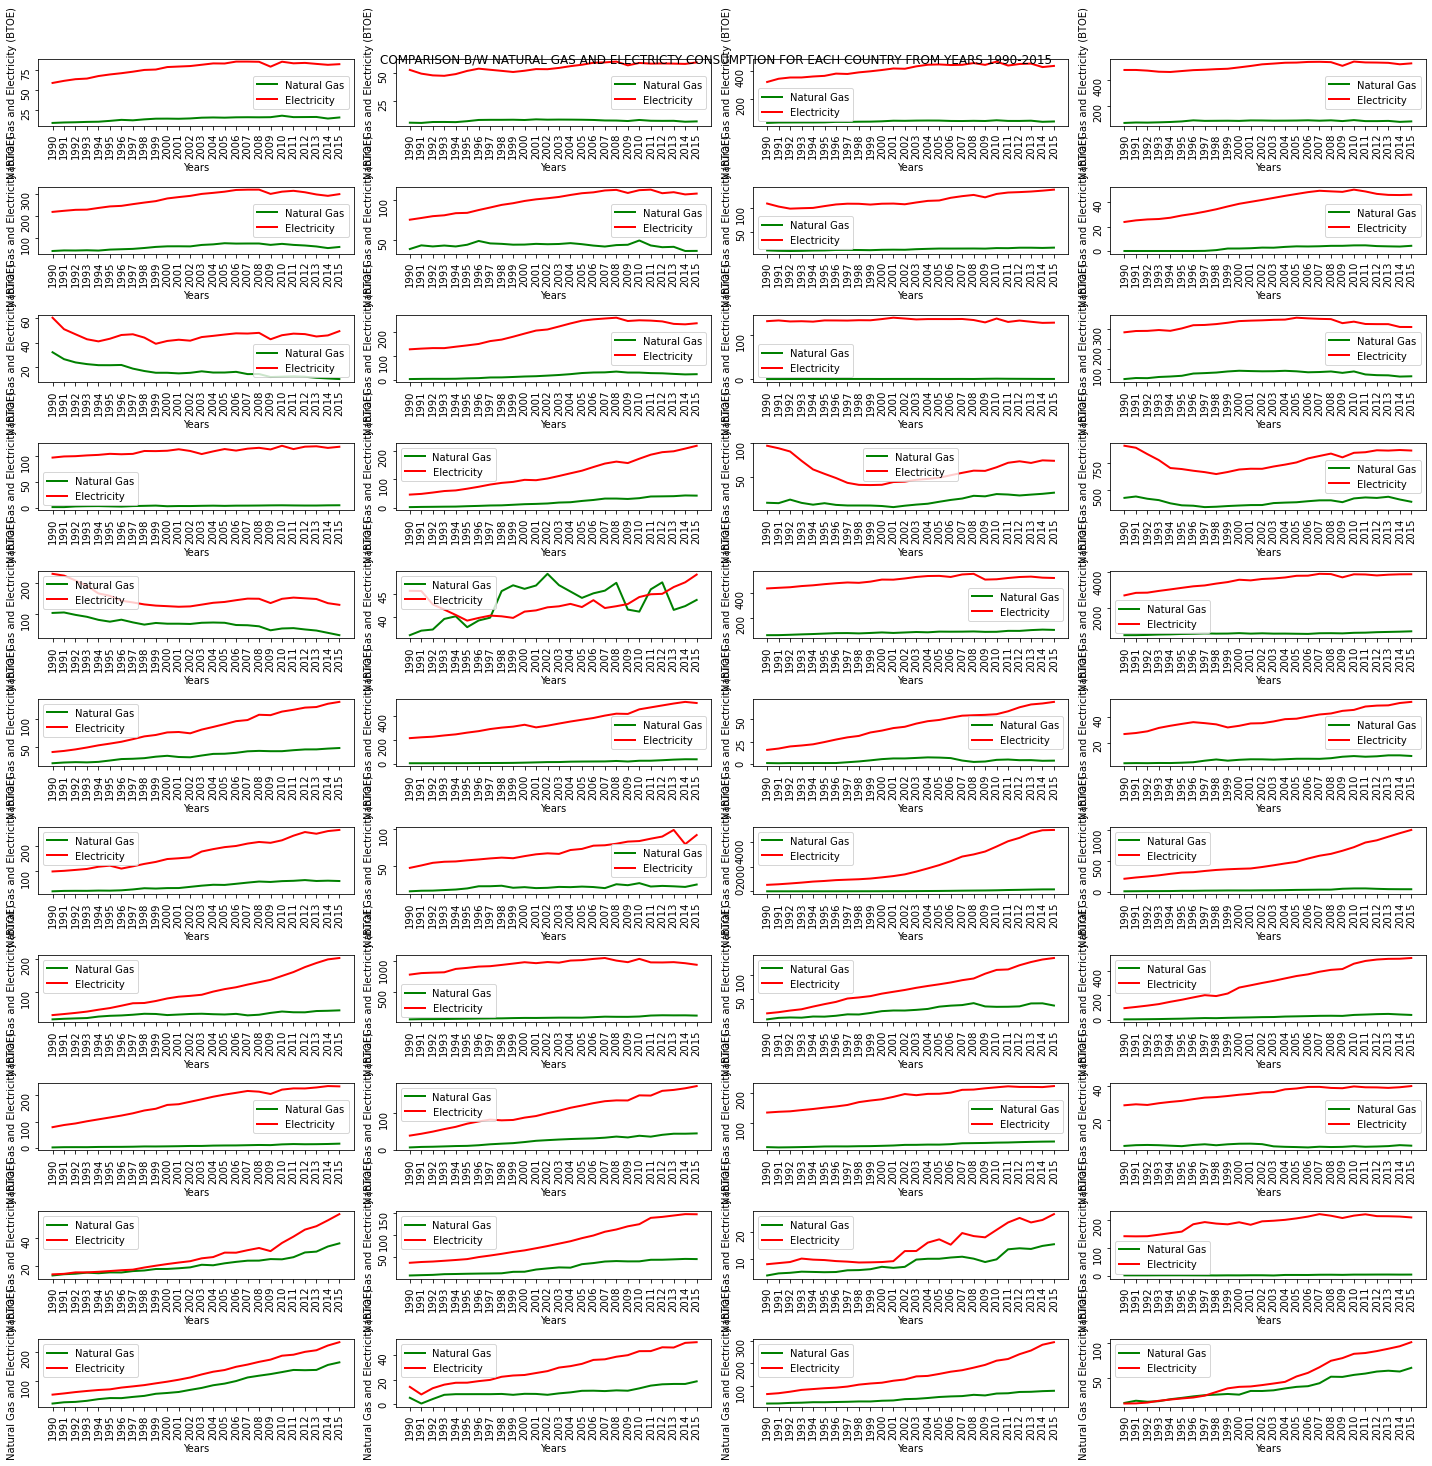

In [8]:
# 4. Using Matplotlib, make a single creative graph comparing the Electricity and Natural Gas for each country and each year 
#    from EnergyType. You can create any type of graph, just make sure you compare the two types of consumption.

%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(20, 20), nrows = 11, ncols = 4)
ax = axes.flat

for country in EnergyType_dict.keys():
    # CONVERTING TO COMMON UNITS (BCM TO MTOE)
    EnergyType_dict[country]["Natural Gas"] = np.array(EnergyType_dict[country]["Natural Gas"]) * 0.90   
    EnergyType_dict[country]["Electricity"] = np.array(EnergyType_dict[country]["Electricity"])
    #pp.pprint(EnergyType_dict)
for i in range(len(EnergyType_countries_list)):
    ax[i].plot(EnergyType_years_list, EnergyType_dict[EnergyType_countries_list[i]]["Natural Gas"], lw = 2, color = "green", label = "Natural Gas")
    ax[i].plot(EnergyType_years_list, EnergyType_dict[EnergyType_countries_list[i]]["Electricity"], lw = 2, color = "red", label = "Electricity" )
    ax[i].set_xlabel("Years")
    ax[i].set_ylabel("Natural Gas and Electricity (BTOE)")
    ax[i].set_xticks(np.arange(0, len(EnergyType_years_list)))
    ax[i].tick_params(rotation = 90)
    ax[i].legend(loc = "best")
    fig.suptitle("COMPARISON B/W NATURAL GAS AND ELECTRICTY CONSUMPTION FOR EACH COUNTRY FROM YEARS 1990-2015")
    
    plt.tight_layout()
plt.show()
plt.close()

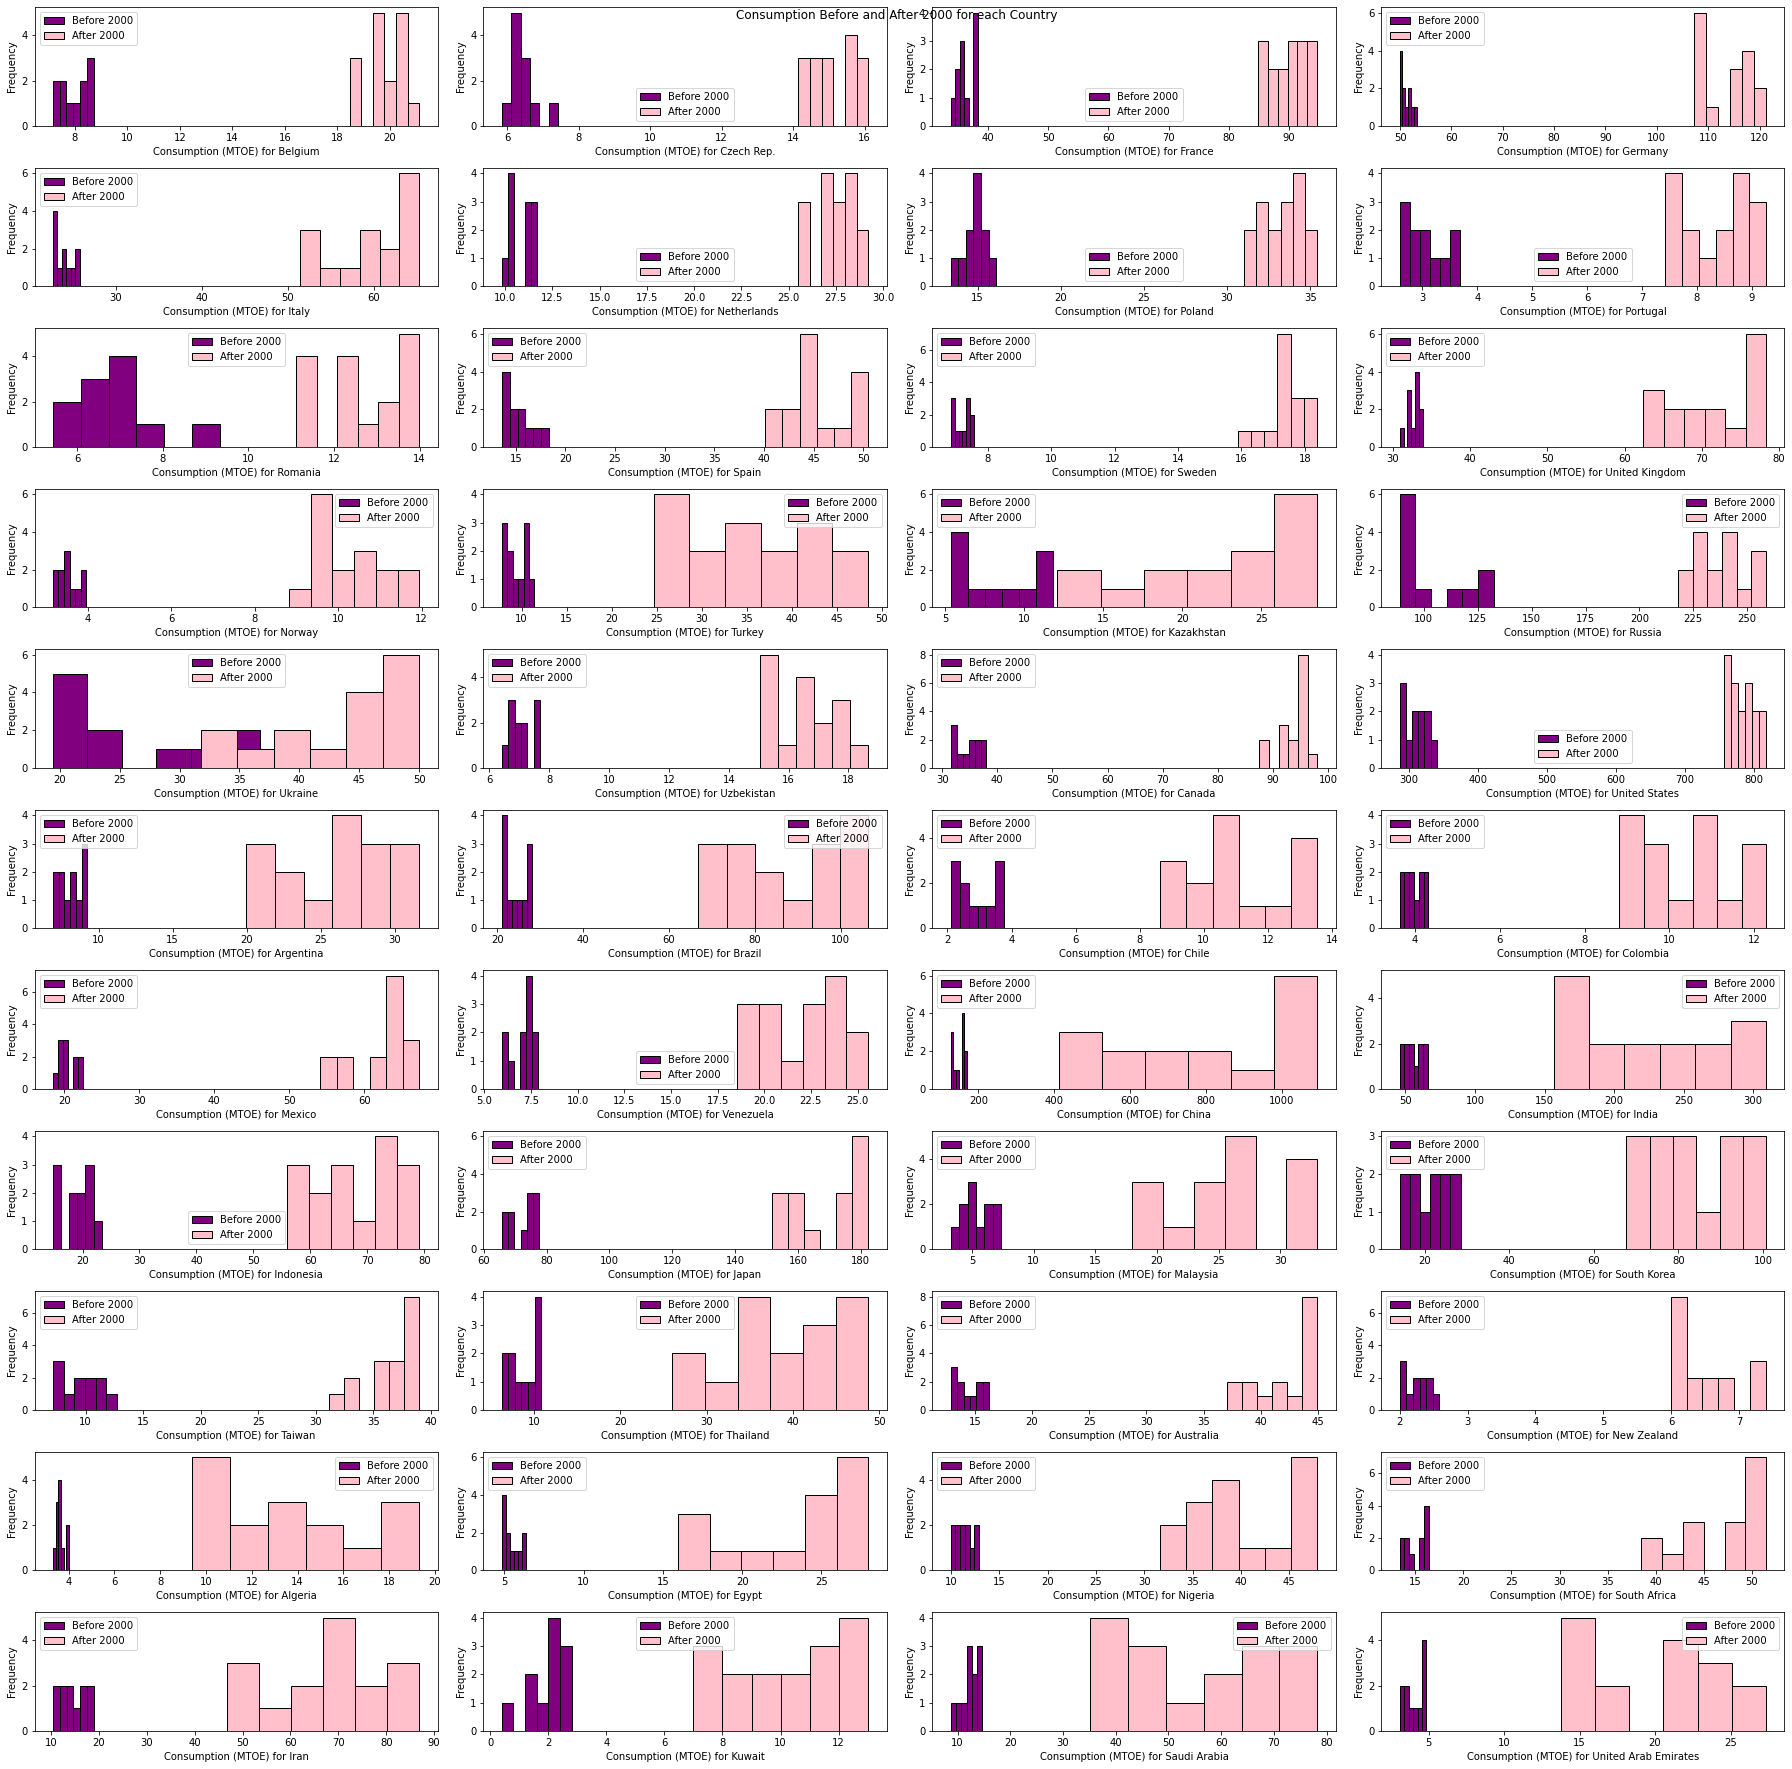

In [9]:
# 5. Save a 2D array named Ind with all the data corresponding to the industrial usage type in Consumers. 
#    The industrial usage is accounted for 15% of the total energy consumption up to the year 2000 and 35% of the total 
#    energy consumption after the year 2000. For example, if the energy consumption during the year 1999 is 30 MTOE then 
#    4.5 MTOE (15 % of 30 ) would be the industrial usage. 


import matplotlib.pyplot as plt
import math

index2000 = Consumers_years_list.index("2000")

before2000 = Consumers[: , :index2000+1] * 0.15
after2000 = Consumers[: , index2000+1:] * 0.35

Ind = np.concatenate((before2000 , after2000), axis = 1)

# 6.  Using Matplotlib, create a single histogram of Ind for each country and each year. Make the color of the graph 
#     different for the two time periods (before and after 2000).

def findBins(Consumers):                      
    bins = math.ceil(len(Consumers) ** 0.5)
    return bins

fig, axes = plt.subplots(figsize=(25, 25), nrows = 11, ncols = 4)
ax = axes.flat

for i in range(Ind.shape[0]):
    ax[i].hist(before2000[i] , findBins(Ind[1]) , color = 'purple', edgecolor = "black" , label = "Before 2000")
    ax[i].hist(after2000[i] , findBins(Ind[1]) , color = 'pink', edgecolor = "black" , label = "After 2000")
    ax[i].legend(loc = "best")
    ax[i].set_xlabel("Consumption (MTOE) for {}".format(Consumers_countries_list[i]))
    ax[i].set_ylabel("Frequency")
    fig.suptitle("Consumption Before and After 2000 for each Country")
    plt.tight_layout()
plt.show()
plt.close()

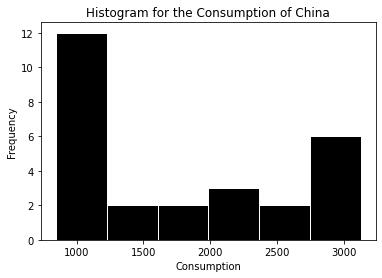

In [10]:
# 7.  Make a histogram of the consumption for China only from Consumers.

import matplotlib.pyplot as plt
import math

indexChina = Consumers_countries_list.index("China")

def findBins(Consumers):                      
    bins = math.ceil(len(Consumers) ** 0.5)
    return bins

chinaVal = Consumers[indexChina , :]

plt.hist(chinaVal , findBins(chinaVal) , color = "k" , edgecolor = "white")
plt.xlabel("Consumption" , fontsize = 10)
plt.ylabel("Frequency" , fontsize = 10)
plt.title("Histogram for the Consumption of China")
plt.show()
plt.close()

In [11]:
# 8. Create a new numpy object array variable named Continent for usage by continent data from Consumers. This variable 
#    should have the following categories: (Note, use your own discretion when deciding which continent certain border 
#    countries belong to, such as Turkey)
# a. Europe
# b. North America
# c. South America
# d. Asia
# e. Africa
# f. Middle east


import pprint as pp
import numpy as np

na = ["Canada" , "United States" , "Mexico"]
sa = ["Argentina" , "Brazil" , "Chile" , "Colombia" , "Venezuela"]
europe = ["Belgium" , "Czech Rep. " , "France" , "Germany" , "Italy" , "Netherlands" , "Poland" , "Portugal" , "Romania" , "Sweden" , "United Kingdom" , "Norway"] 
africa = ["Algeria" , "Nigeria" , "Egypt" , "South Africa"]
asia = ["Kazakhstan" , "Russia" , "Ukraine" , "Uzbekistan" , "China" , "India" , "Indonesia" , "Japan" , "Malaysia" , "South Korea" , "Taiwan" , "Thailand" , "Australia" , "New Zealand"]
me = ["Turkey" , "Iran" , "Kuwait" , "Saudi Arabia" , "United Arab Emiarates"] 

na_list = []
sa_list = []
europe_list = []
africa_list = []
asia_list = []
me_list = []

#print(f"Consumers_countries_list = {Consumers_countries_list}")

Consumers_dict = {}
for index, country in enumerate(Consumers_countries_list): 
    Consumers_dict[country] = {}
    Consumers_dict[country]["Index"] = index
    Consumers_dict[country]["Values"] = Consumers[index]
    
    if country in na:
        Consumers_dict[country]["Continent"] = "North America"
        na_list.append(Consumers_dict[country]["Values"])
    elif country in sa:
        Consumers_dict[country]["Continent"] = "South America"
        sa_list.append(Consumers_dict[country]["Values"])
    elif country in europe:
        Consumers_dict[country]["Continent"] = "Europe"
        europe_list.append(Consumers_dict[country]["Values"])
    elif country in africa:
        Consumers_dict[country]["Continent"] = "Africa"
        africa_list.append(Consumers_dict[country]["Values"])
    elif country in asia:
        Consumers_dict[country]["Continent"] = "Asia"
        asia_list.append(Consumers_dict[country]["Values"])
    else:
        Consumers_dict[country]["Continent"] = "Middle East"
        me_list.append(Consumers_dict[country]["Values"])
        
na_array = np.sum(np.array(na_list), axis = 0).reshape(1, 27)
sa_array = np.sum(np.array(sa_list), axis = 0).reshape(1, 27)
europe_array = np.sum(np.array(europe_list), axis = 0).reshape(1, 27)
africa_array = np.sum(np.array(africa_list), axis = 0).reshape(1, 27)
asia_array = np.sum(np.array(asia_list), axis = 0).reshape(1, 27)
me_array = np.sum(np.array(me_list), axis = 0).reshape(1, 27)

Continent = np.concatenate( (na_array, sa_array, 
                             europe_array, africa_array, 
                             asia_array, me_array), axis = 0)
print(f"Continent = {Continent}")

Continent = [[2244.2755173  2265.2901022  2310.0106023  2354.2290822  2402.6425278
  2428.208506   2481.4507172  2512.3921807  2541.5808908  2602.2103922
  2673.0093622  2631.3249537  2662.3905309  2690.64756    2745.0778562
  2769.4273819  2748.2922969  2789.1972412  2730.0358658  2607.7729582
  2656.0234055  2646.8721198  2622.5386682  2653.0857243  2690.958229
  2662.7425304  2658.9860091 ]
 [ 264.51211687  270.87371375  281.48038126  283.64273551  303.59663867
   308.28227091  324.57907222  336.30972733  347.35213438  348.5090624
   351.5833841   353.02447403  361.29204182  364.64011027  386.79901021
   394.25617276  416.56552781  426.54106475  451.64662466  441.87203786
   479.63507807  483.45270443  505.1838379   518.64743604  528.28822465
   526.30643121  516.13329911]
 [1300.99471059 1308.88501738 1289.60036193 1293.50794173 1289.69396688
  1319.23676684 1366.25922815 1344.52070738 1350.99621595 1339.57994512
  1343.54334675 1367.78121313 1356.12038    1380.11278493 1388.877357

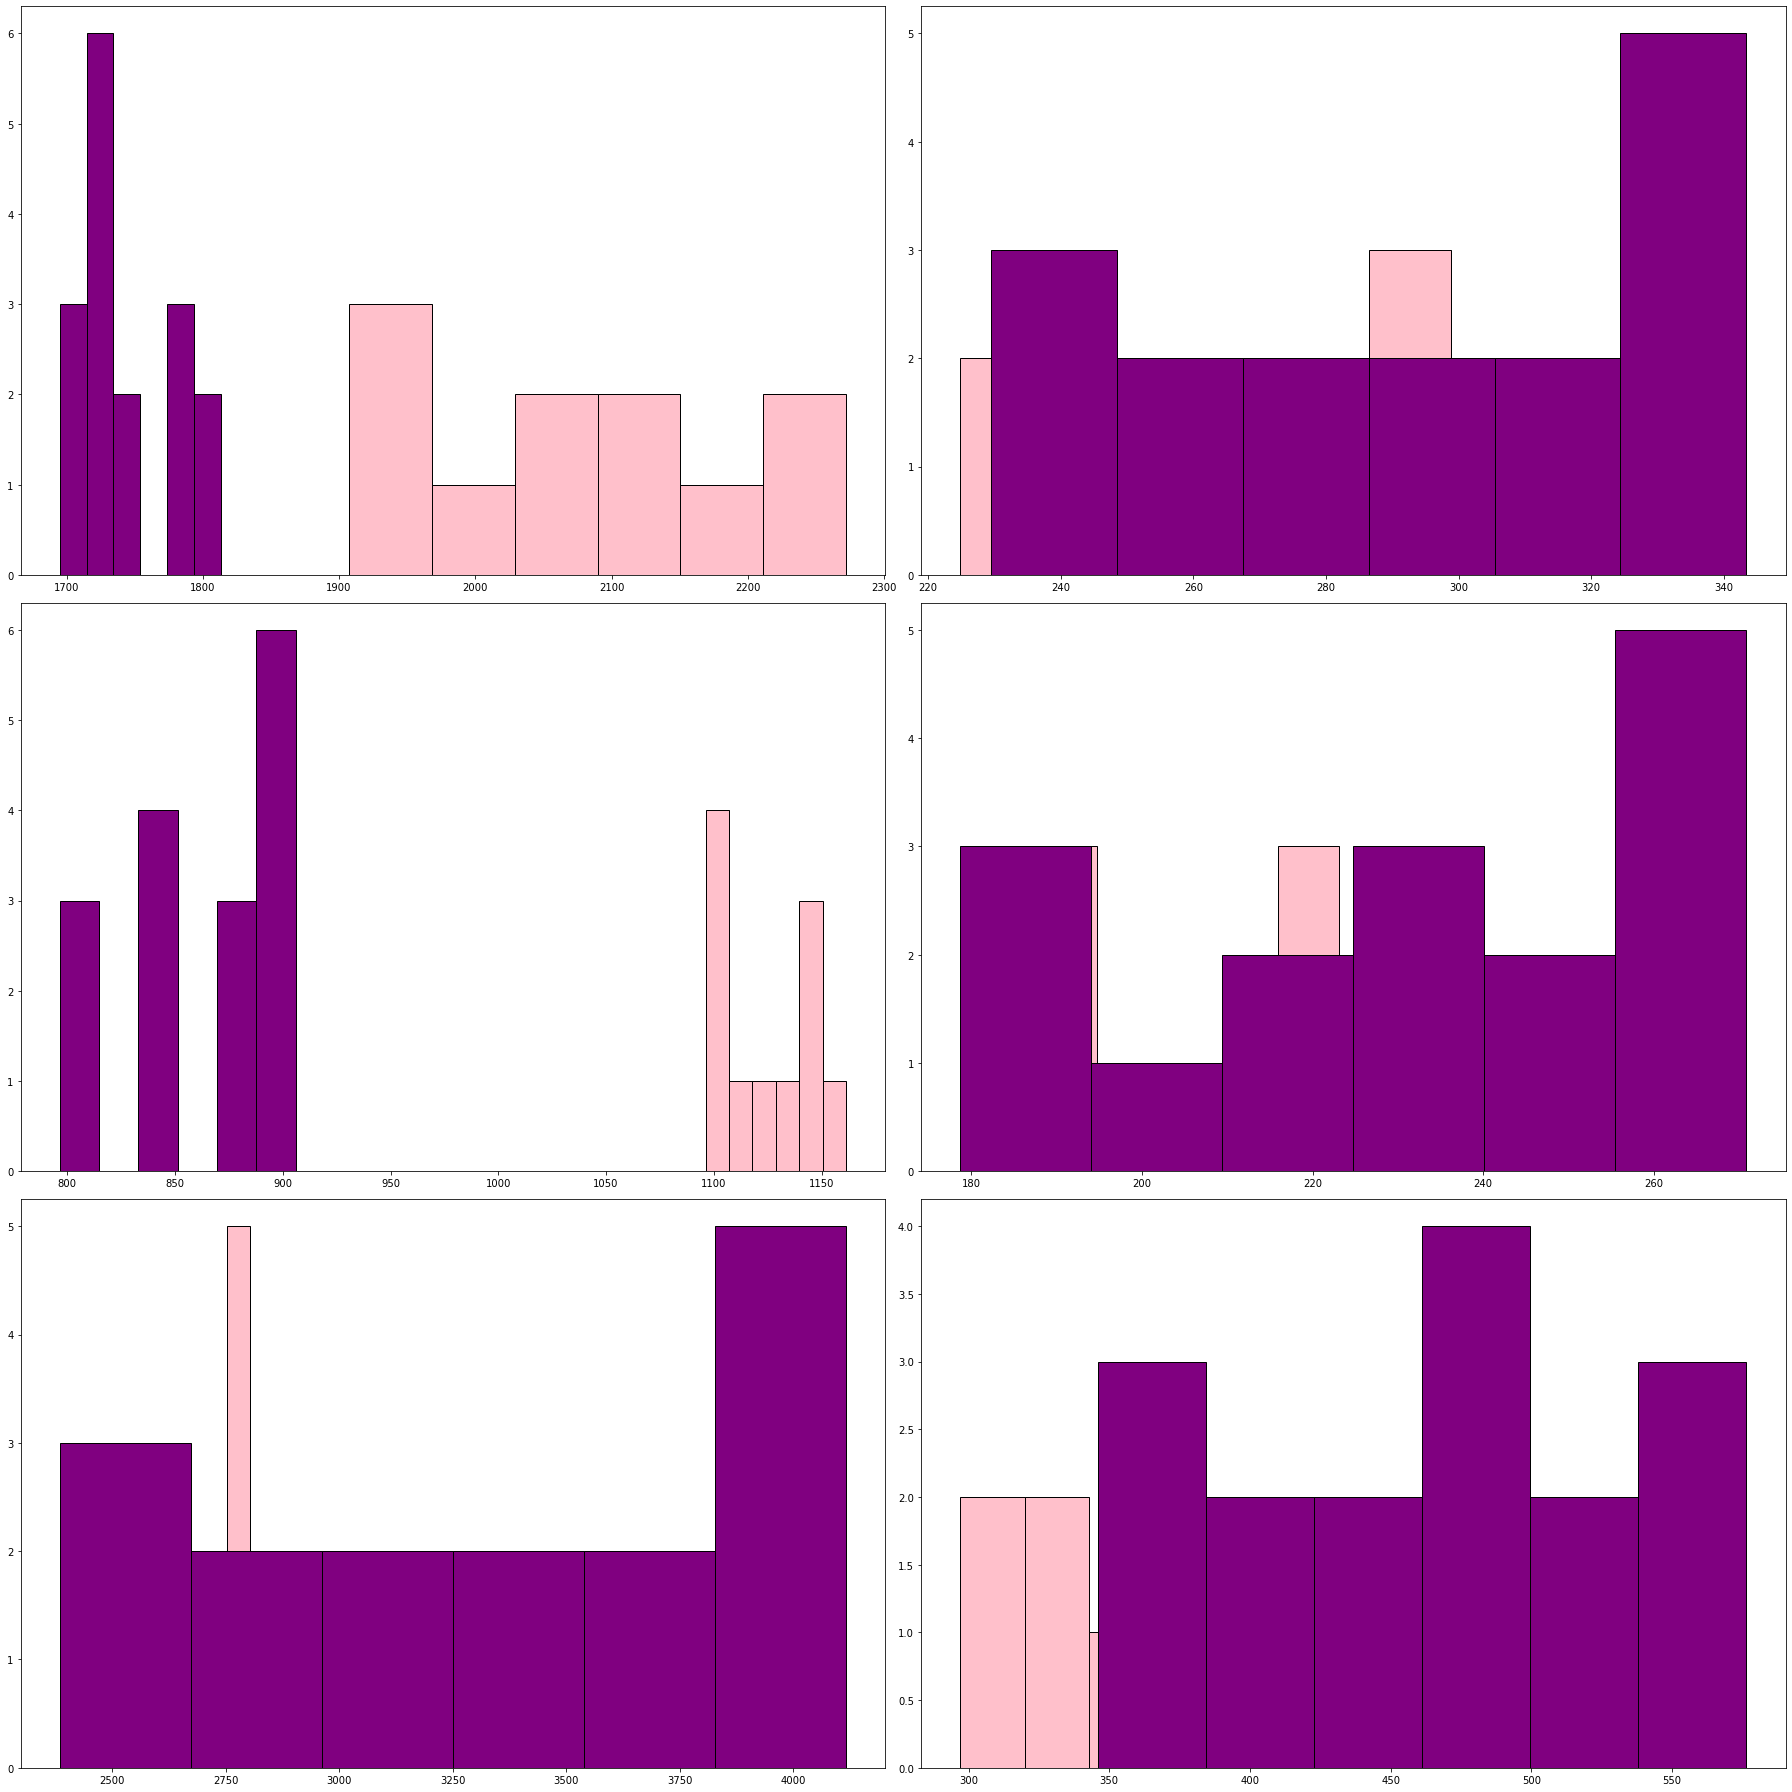

In [12]:
# 9. Create a histogram of Continents for Only Residential usage (Residential is the opposite of Industrial).

import matplotlib.pyplot as plt
import math

index2000 = Consumers_years_list.index("2000")

before2000 = Continent[: , :index2000+1] * 0.85
after2000 = Continent [: , index2000+1:] * 0.65

def findBins(Consumers):                      
    bins = math.ceil(len(Consumers) ** 0.5)
    return bins

fig, axes = plt.subplots(figsize=(25, 25), nrows = 3, ncols = 2)
ax = axes.flat

for i in range(Continent.shape[0]):
    ax[i].hist(before2000[i] , findBins(Continent[1]) , color = "pink" , edgecolor = "k")
    ax[i].hist(after2000[i] , findBins(Continent[1]) , color = "purple" , edgecolor = "k")
    plt.tight_layout()
plt.show()
plt.close()

In [13]:
# 10. LOAD THE FILE 'CARBONEMISSIONS.TXT' INTO A LIST NAMED CARBONEMISSIONS

CarbonEmissions = []

with open("CarbonEmissions.txt" , "r") as carbon:
    CarbEmi = carbon.read().splitlines()
for i in CarbEmi:
    i = i.replace("\t" , ",")
    CarbonEmissions.append(i)
print(CarbonEmissions)

['Country Rank,Country,Total CO2 Emissions', '1,China,9040.74', '2,United States,4997.5', '3,India,2066.01', '4,Russia,1468.99', '5,Japan,1141.58', '6,Germany,729.77', '7,South Korea,585.99', '8,Iran,552.4', '9,Canada,549.23', '10,Saudi Arabia,531.46', '11,Brazil,450.79', '12,Mexico,442.31', '13,Indonesia,441.91', '14,South Africa,427.57', '15,United Kingdom,389.75', '16,Australia,380.93', '17,Italy,330.75', '18,Turkey,317.22', '19,France,290.49', '20,Poland,282.4']


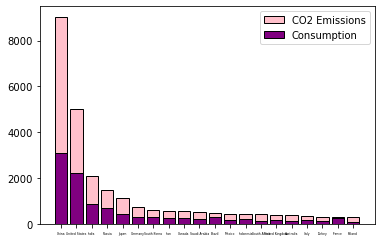

In [14]:
# 11. Using a double bar graph, compare the twenty countries’ carbon emissions (million metric tons) from CarbonEmissions 
#     to their respective consumption in Consumers for the year 2015.

import matplotlib.pyplot as plt
import math

CarbonEmissionsLists = []
CO2EmissionValues = []
Consumers_20countries_list = []
Consumers_20values_list = []

index2015 = Consumers_years_list.index("2015")

for line in CarbEmi:                                # File in the form of list of lists
    line = line.split("\t")
    CarbonEmissionsLists.append(line)               
    
for line in CarbonEmissionsLists[1:]:               # CO2 Emissions for 20 countries
    Consumers_20countries_list.append(line[1])      # List of 20 countries
    CO2EmissionValues.append(float(line[2]))                                        

for country in Consumers_20countries_list:           # Consumers values list for 44 countries in 2015
    index = Consumers_dict[country]["Index"]
    row = Consumers[index]
    Consumers_20values_list.append(float(row[index2015]))     # Consumers values for 20 countries in 2015              

plt.bar(Consumers_20countries_list , CO2EmissionValues , color = "pink" , edgecolor = "k" , label = "CO2 Emissions")
plt.bar(Consumers_20countries_list , Consumers_20values_list , color = "purple" , edgecolor = "k" , label = "Consumption")
plt.legend(loc = "best")
plt.xticks(fontsize = 3)
plt.show()
plt.close()

In [15]:
# 12. What are the countries with the highest energy usage? In what continent are they located? Use print() to answer this question.

import pprint as pp
from operator import itemgetter

Consumers_country_sum_dict = {}

for country in Consumers_countries_list:
    Consumers_country_sum_dict[country] = sum(Consumers_dict[country]["Values"])

top5 = dict(sorted(Consumers_country_sum_dict.items(), key = itemgetter(1), reverse = True)[:6])
  
countryKeys = list(top5.keys())
countrySum = list(top5.values())

for country in countryKeys: 
    print("Country: {}               Energy Consumption: {}               Continent: {}".format(country, countrySum[countryKeys.index(country)], Consumers_dict[country]["Continent"]))


Country: United States               Energy Consumption: 58605.854337000004               Continent: North America
Country: China               Energy Consumption: 47646.974308               Continent: Asia
Country: Russia               Energy Consumption: 18506.335891299997               Continent: Asia
Country: India               Energy Consumption: 14352.971765               Continent: Asia
Country: Japan               Energy Consumption: 13044.322713800004               Continent: Asia
Country: Germany               Energy Consumption: 8955.716878199999               Continent: Europe
